# PySpark – это фреймворк для обработки больших объемов данных с использованием языка Python. Он основан на Apache Spark, который является одной из наиболее широко используемых платформ для работы с данными в масштабе веба.

PySpark – это модуль Python для анализа больших объемов данных с использованием технологии Apache Spark.

Apache Spark – это распределенная система обработки данных, которая позволяет работать с данными объемом в гигабайты и терабайты. Она обладает высокой скоростью обработки данных и эффективностью.

PySpark использует язык программирования Python для написания программ, которые работают с данными в Apache Spark. В PySpark можно использовать широкий набор библиотек Python, что делает его очень гибким и удобным для использования.

С помощью PySpark можно решать различные задачи, связанные с анализом данных: от простых подсчетов до сложных машинного обучения. Он очень популярен среди специалистов в области анализа данных, так как позволяет справляться с огромным объемом данных.

Для работы с PySpark необходимо установить Apache Spark и Python, а затем установить PySpark. После этого можно начинать использовать PySpark для анализа данных.

# Установка PySpark
Шаг 1: Проверим корректность установленного Java Runtime Environment (JRE), так как PySpark требует версию Java 8 или выше. Для проверки выполним команду:

**java -version**

Шаг 2: Установим Apache Spark. Для этого необходимо скачать архив с официального сайта (https://spark.apache.org/downloads.htm) и распаковать его. Рекомендуется выбирать версию с Hadoop, чтобы полноценно использовать PySpark.

Шаг 3: Установим PySpark. Самым простым способом является установка через пакетный менеджер pip с помощью команды:

**pip install pyspark**

Шаг 4: Настроим переменные окружения. Установим переменную окружения PYSPARK_PYTHON на путь к Python, который мы собираемся использовать для запуска PySpark. Кроме того, добавим $SPARK_HOME/bin в переменную окружения PATH.

Шаг 5: Проверим установку. Для этого запустим интерпретатор PySpark следующей командой:

**pyspark**


Основной объект в PySpark – это Resilient Distributed Dataset (RDD), который является неизменяемым распределенным набором данных, способным к параллельной обработке.

PySpark использует Hadoop Distributed File System (HDFS) для хранения данных и выполнения параллельных задач на кластере. Кроме того, PySpark интегрирован с библиотеками Python, такими как NumPy, Pandas и Matplotlib.

Теперь, когда у нас запущен и работает PySpark, мы выполним комплексный проект сегментации клиентов. 

Сегментация клиентов — это маркетинговый метод, который компании используют для выявления и группировки пользователей, обладающих схожими характеристиками. Например, если вы посещаете Starbucks только летом, чтобы купить холодные напитки, вас можно отнести к категории «сезонных покупателей» и соблазнить специальными акциями, разработанными для летнего сезона.

Специалисты по данным обычно создают алгоритмы машинного обучения без учителя, например кластеризацию K-Means или иерархическую кластеризации, для сегментации клиентов. Эти модели отлично подходят для выявления схожих закономерностей между группами пользователей, которые часто остаются незамеченными для человеческого глаза.

В этом руководстве мы будем использовать кластеризацию K-Means для сегментации клиентов в наборе данных электронной коммерции.

Выпоним такие шаги:
1. Чтение CSV-файлов с помощью PySpark
2. Исследовательский анализ данных с помощью PySpark
3. Группировка и сортировка данных
4. Выполнение арифметических операций
5. Агрегирование наборов данных
6. Предварительная обработка данных с помощью PySpark
7. Работа со значениями даты и времени
8. Преобразование типов
9. Объединение двух фреймов данных
10. Функция rank()
11. Машинное обучение PySpark
12. Создание вектора признаков
13. Стандартизация данных
14. Построение модели кластеризации K-Means
15. Интерпретация модели

---

# Создадим сеанс SparkSession
SparkSession — это точка входа во все функции Spark, которая требуется, если мы хотим создать фрейм данных в PySpark. Запустим следующие строки кода, чтобы инициализировать SparkSession:

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Pyspark test").config("spark.memory.offHeap.enabled", "true").config(
    "spark.memory.offHeap.size", "10g").getOrCreate()

# Создание DataFrame
Теперь мы можем прочитать набор данных:

In [3]:
df = spark.read.csv('Datasets/online_retail.csv', header=True,
                    escape="\"")  # Параметр header - есть ли наименования стоблцов (у нас есть)

Чтобы отобразить первые строки датафрейма, нам достаточно использовать комадну show()

In [4]:
df.show(5, 0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------+--------+------

Датафрейм состоит из 8 столбцов:

1. InvoiceNo: уникальный идентификатор каждого счета клиента.
2. StockCode: уникальный идентификатор каждого товара на складе.
3. Description: товар, приобретенный покупателем.
4. Quantity: количество каждого товара, приобретенного покупателем в одном счете.
5. InvoiceDate: дата покупки.
6. UnitPrice: цена одной единицы каждого товара.
7. CustomerID: уникальный идентификатор, присваиваемый каждому пользователю.
8. Country: страна, в которой была совершена покупка.

# Исследовательский анализ данных
Теперь, когда мы увидели переменные, присутствующие в этом наборе данных, проведем некоторый исследовательский анализ данных, чтобы лучше понять данные:

Начнем с подсчета количества строк в кадре данных:

In [5]:
df.count()

541909

Сколько уникальных клиентов присутствует в кадре данных:

In [6]:
df.select('CustomerID').distinct().count()

4373

Из какой страны совершается большинство покупок:

In [7]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).show()

+------------------+-------------+
|           Country|country_count|
+------------------+-------------+
|            Sweden|            8|
|         Singapore|            1|
|           Germany|           95|
|               RSA|            1|
|            France|           87|
|            Greece|            4|
|European Community|            1|
|           Belgium|           25|
|           Finland|           12|
|             Malta|            2|
|       Unspecified|            4|
|             Italy|           15|
|              EIRE|            3|
|         Lithuania|            1|
|            Norway|           10|
|             Spain|           31|
|           Denmark|            9|
|         Hong Kong|            0|
|            Israel|            4|
|           Iceland|            1|
+------------------+-------------+


Данные в таблице выше представлены не в порядке убывания. Чтобы отсортировать эту таблицу, мы можем использовать orderBy():

In [8]:
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+---------------+-------------+
|        Country|country_count|
+---------------+-------------+
| United Kingdom|         3950|
|        Germany|           95|
|         France|           87|
|          Spain|           31|
|        Belgium|           25|
|    Switzerland|           21|
|       Portugal|           19|
|          Italy|           15|
|        Finland|           12|
|        Austria|           11|
|         Norway|           10|
|        Denmark|            9|
|Channel Islands|            9|
|      Australia|            9|
|    Netherlands|            9|
|         Sweden|            8|
|         Cyprus|            8|
|          Japan|            8|
|         Poland|            6|
|         Greece|            4|
+---------------+-------------+


Когда клиент совершил последнюю покупку на платформе:

Чтобы узнать, когда на платформе была совершена последняя покупка, нам нужно преобразовать столбец "InvoiceDate" в формат временной метки и использовать функцию max()

In [9]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date', to_timestamp("InvoiceDate", 'yy/MM/dd HH:mm'))
df.select(max("date")).show()

+-------------------+
|          max(date)|
+-------------------+
|2012-12-10 16:21:00|
+-------------------+


Когда клиент совершил самую раннюю покупку на платформе:

In [12]:
df = df.withColumn('date', to_timestamp("InvoiceDate", 'yy/MM/dd HH:mm'))
df.select(min("date")).show()

+-------------------+
|          min(date)|
+-------------------+
|0001-04-11 10:00:00|
+-------------------+


# Предварительная обработка данных

In [13]:
df.show(5, 0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEA

Из приведенного выше набора данных нам нужно создать несколько сегментов клиентов на основе покупательского поведения каждого пользователя. 

Переменные в этом наборе данных имеют формат, который нелегко использовать в модели сегментации клиентов. Эти характеристики по отдельности мало что говорят нам о покупательском поведении клиентов.

В связи с этим мы будем использовать существующие переменные для получения трех новых информативных характеристик — давности, частоты и денежной стоимости (RFM).

RFM обычно используется в маркетинге для оценки ценности клиента на основе его:

1. Давность: как давно каждый клиент совершил покупку?
2. Частота: как часто они что-то покупали?
3. Денежная стоимость: сколько денег они в среднем тратят при совершении покупок?

Для начала посчитаем значение давности — самой последней даты и времени совершения покупки на платформе. Этого можно достичь в два этапа:

Присвоим каждому клиенту оценку давности.
Мы вычтем каждую дату в кадре данных из самой ранней даты. Это скажет нам, как недавно клиент был замечен в кадре данных. Значение 0 указывает на самую низкую давность, поскольку оно будет присвоено человеку, которого видели совершающим покупку в самую раннюю дату.

In [14]:
df = df.withColumn("from_date", lit("12/1/10 08:26"))
df = df.withColumn('from_date', to_timestamp("from_date", 'yy/MM/dd HH:mm'))

df2 = df.withColumn('from_date', to_timestamp(col('from_date'))).withColumn('recency', col("date").cast("long") - col(
    'from_date').cast("long"))

Выберем самую последнюю покупку.
Один клиент может совершить несколько покупок в разное время. Нам нужно выбрать только последний раз, когда он покупал товар, поскольку это указывает на то, когда была совершена последняя покупка: 

In [15]:
df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')), on='recency', how='leftsemi')

Посмотрим на заголовок нового фрейма данных. Теперь к нему добавлен столбец под названием "recency":

In [16]:
df2.show(5, 0)

+-------+---------+---------+----------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|recency|InvoiceNo|StockCode|Description                       |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |from_date          |
+-------+---------+---------+----------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|540    |536369   |21756    |BATH BUILDING BLOCK WORD          |3       |12/1/10 8:35|5.95     |13047     |United Kingdom|2012-01-10 08:35:00|2012-01-10 08:26:00|
|2040   |536371   |22086    |PAPER CHAIN KIT 50'S CHRISTMAS    |80      |12/1/10 9:00|2.55     |13748     |United Kingdom|2012-01-10 09:00:00|2012-01-10 08:26:00|
|3960   |536375   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER|6       |12/1/10 9:32|2.55     |17850     |United Kingdom|2012-01-10 09:32:00|2012-01-10 08:26:00|
|3960   |536375   |710

Более простой способ просмотреть все данные, присутствующие в датафрейме PySpark, — использовать функцию printSchema(). Это эквивалент функции info() в Pandas:

In [17]:
df2.printSchema()

root
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)


Теперь посчитаем значение частоты — как часто клиент что-то покупал на платформе. Для этого нам просто нужно сгруппировать по каждому идентификатору клиента и посчитать количество купленных им товаров:

In [18]:
df_freq = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('frequency'))

In [19]:
df_freq.show(5, 0)

+----------+---------+
|CustomerID|frequency|
+----------+---------+
|16250     |14       |
|15574     |121      |
|15271     |24       |
|15555     |37       |
|17757     |49       |
+----------+---------+


К каждому клиенту в датафрейме добавляется значение частоты. Этот новый датафрейм имеет только два столбца, и нам нужно соединить его с предыдущим:

In [20]:
df3 = df2.join(df_freq, on='CustomerID', how='inner')

In [21]:
df3.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- frequency: long (nullable = false)


Наконец, рассчитаем денежную стоимость — общую сумму, потраченную каждым клиентом. Есть два шага для достижения этой цели:

1. Найдем общую сумму, потраченную на каждую покупку.
Каждый идентификатор клиента имеет переменные "Quantity" и "UnitPrice" для одной покупки. Чтобы получить общую сумму, потраченную каждым покупателем за одну покупку, нам нужно умножить "Quantity" на "UnitPrice":

In [22]:
m_val = df3.withColumn('TotalAmount', col("Quantity") * col("UnitPrice"))

2. Найдём общую сумму, потраченную каждым покупателем.
Чтобы найти общую сумму, потраченную каждым клиентом в целом, нам просто нужно сгруппировать по столбцу CustomerID и просуммировать общую потраченную сумму:

In [23]:
m_val = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('monetary_value'))

Объединим оба датафрейма

In [24]:
finaldf = m_val.join(df3, on='CustomerID', how='inner')

Теперь, когда мы создали все необходимые столбцы для построения модели, запустим следующие строки кода, чтобы выбрать только необходимые столбцы и удалить повторяющиеся строки из фрейма данных:

In [25]:
finaldf = finaldf.select(['recency', 'frequency', 'monetary_value', 'CustomerID']).distinct()

In [26]:
finaldf.show(5, 0)

+--------+---------+-----------------+----------+
|recency |frequency|monetary_value   |CustomerID|
+--------+---------+-----------------+----------+
|5580    |14       |226.14           |16250     |
|2704800 |121      |375.65           |15574     |
|21100860|24       |111.75           |15271     |
|21112020|37       |620.3499999999998|15555     |
|23703000|49       |385.25           |17757     |
+--------+---------+-----------------+----------+


# Стандартизация | Нормализация
Прежде чем строить модель сегментации клиентов, стандартизируем фрейм данных, чтобы гарантировать, что все переменные имеют одинаковый масштаб:

In [27]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble = VectorAssembler(inputCols=['recency', 'frequency', 'monetary_value'], outputCol='features')

assembled_data = assemble.transform(finaldf)

scale = StandardScaler(inputCol='features', outputCol='standardized')
data_scale = scale.fit(assembled_data)
data_scale_output = data_scale.transform(assembled_data)

In [28]:
data_scale_output.select('standardized').show(2, truncate=False)

+-------------------------------------------------------------+
|standardized                                                 |
+-------------------------------------------------------------+
|[1.827806780736465E-7,0.4589020319425581,0.07645669520731259]|
|[8.859949427483853E-5,3.9662247046463945,0.12700520719300865]|
+-------------------------------------------------------------+


# Построение модели машинного обучения
Теперь, когда мы завершили весь анализ и подготовку данных, давайте построим модель кластеризации K-Means. 

Алгоритм будет создан с использованием API машинного обучения PySpark .

При построении модели кластеризации K-Means нам сначала нужно определить количество кластеров или групп, которые мы хотим, чтобы алгоритм возвращал. Если мы, например, выберем три кластера, то у нас будет три клиентских сегмента.

Самый популярный метод, используемый для принятия решения о том, сколько кластеров использовать в K-Means, называется «методом локтя».

Это делается простым запуском алгоритма K-Means для широкого спектра кластеров и визуализацией результатов модели для каждого кластера. На графике будет точка перегиба, похожая на колено, и мы просто выбираем количество кластеров в этой точке.

Построим алгоритм кластеризации K-Means от 2 до 10 кластеров:

In [29]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

for i in range(2, 10):
    KMeans_algo = KMeans(featuresCol='standardized', k=i)
    KMeans_fit = KMeans_algo.fit(data_scale_output)
    output = KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

Мы успешно построили и оценили модель кластеризации K-Means с количеством кластеров от 2 до 10. Результаты были помещены в массив и теперь могут быть отображены в виде графика:

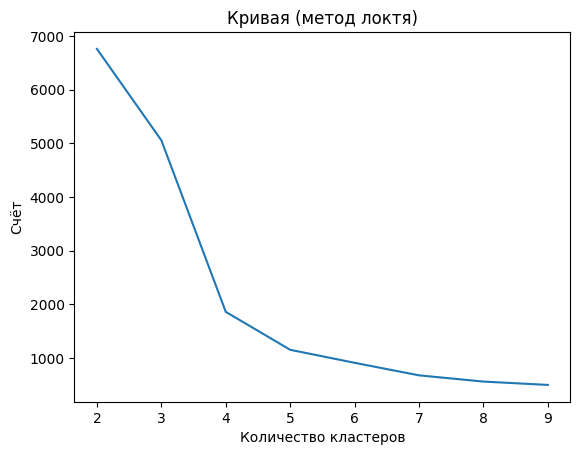

In [30]:
import pandas as pd
import pylab as pl

df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2, 10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Количество кластеров')
pl.ylabel('Счёт')
pl.title('Кривая (метод локтя)')
pl.show()

На графике выше мы видим, что на 4-х кластерах есть точка перегиба, похожая на локоть. В связи с этим приступим к построению алгоритма K-Means с четырьмя кластерами:

In [31]:
KMeans_algo = KMeans(featuresCol='standardized', k=4)
KMeans_fit = KMeans_algo.fit(data_scale_output)

Используем созданную нами модель для назначения кластеров каждому клиенту в наборе данных:

In [32]:
preds = KMeans_fit.transform(data_scale_output)
preds.show(5, 0)

+--------+---------+-----------------+----------+-----------------------------------+-------------------------------------------------------------+----------+
|recency |frequency|monetary_value   |CustomerID|features                           |standardized                                                 |prediction|
+--------+---------+-----------------+----------+-----------------------------------+-------------------------------------------------------------+----------+
|5580    |14       |226.14           |16250     |[5580.0,14.0,226.14]               |[1.827806780736465E-7,0.4589020319425581,0.07645669520731259]|1         |
|2704800 |121      |375.65           |15574     |[2704800.0,121.0,375.65]           |[8.859949427483853E-5,3.9662247046463945,0.12700520719300865]|3         |
|21100860|24       |111.75           |15271     |[2.110086E7,24.0,111.75]           |[6.91188082210947E-4,0.7866891976158138,0.03778206283460327] |1         |
|21112020|37       |620.3499999999998|15555   

# Кластерный анализ
Последним шагом является анализ только что построенных клиентских сегментов.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('recency', 'frequency', 'monetary_value', 'prediction')
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['recency', 'frequency', 'monetary_value']

for i in list1:
    sns.barplot(x='prediction', y=str(i), data=avg_df)
    plt.show()

- Кластер 0: клиенты в этом сегменте демонстрируют низкую новизну, частоту и денежную ценность. Они редко делают покупки на платформе и являются малопотенциальными клиентами, которые, скорее всего, перестанут вести дела с компанией электронной коммерции.

- Кластер 1. Пользователи в этом кластере демонстрируют высокую активность в последнее время, но не тратят много денег на платформе. Они также не часто посещают сайт. Это указывает на то, что это могут быть новые клиенты, которые только начали вести дела с компанией.

- Кластер 2. Клиенты в этом сегменте демонстрируют среднюю новизну и частоту посещений и тратят на платформе много денег. Это указывает на то, что они склонны покупать дорогостоящие товары или совершать оптовые закупки.

- Кластер 3. Последний сегмент включает пользователей, которые часто появляются на платформе и часто совершают покупки. Однако они не тратят много денег на платформе, а это может означать, что они склонны выбирать более дешевые товары при каждой покупке.